[[ 1.0681458 ]
 [-2.698995  ]
 [ 2.3326654 ]
 [-3.3758826 ]
 [-2.727457  ]
 [ 3.1712832 ]
 [ 3.0749092 ]
 [-2.186257  ]
 [-1.4455113 ]
 [ 0.74256897]
 [ 3.685553  ]
 [-2.5206947 ]
 [ 3.315611  ]
 [ 3.2327137 ]
 [ 0.47515678]
 [ 2.053564  ]
 [ 0.5972252 ]
 [ 0.6832967 ]
 [-2.3254547 ]
 [ 2.6404305 ]
 [ 3.4937954 ]
 [ 2.4070134 ]
 [ 2.7895927 ]
 [-2.660038  ]
 [-1.5512619 ]
 [-2.9663372 ]
 [ 0.07687855]
 [-3.6230268 ]
 [ 2.6673384 ]
 [ 1.182127  ]
 [-3.4723477 ]
 [-3.715849  ]
 [-2.1851811 ]
 [ 2.626525  ]
 [-2.1431003 ]
 [ 3.4336052 ]
 [ 2.7741947 ]
 [-0.07690811]
 [-0.5819864 ]
 [ 3.2188172 ]
 [ 3.6713223 ]
 [-3.10528   ]
 [-1.132062  ]
 [-1.5330048 ]
 [-3.4422674 ]
 [-1.2983198 ]
 [-2.2578454 ]
 [ 0.72872925]
 [-1.1816521 ]
 [ 3.490983  ]]
(50, 1)
Predicted values  [ 138.63 -257.78  271.69]
Real values       [ -15.820143 -148.63097   102.44357 ]
Trained W         105.23
Trained b         26.23


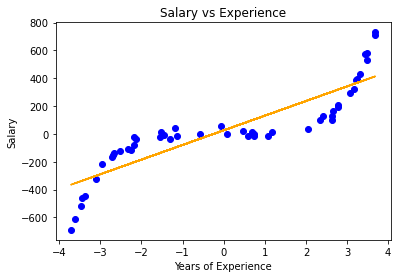

Predicted values  [ 138.31 -256.85  270.95]
Real values       [ -15.820143 -148.63097   102.44357 ]
Trained W         104.9
Trained b         26.26


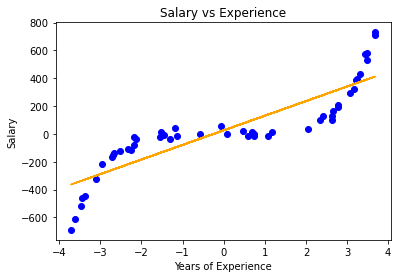

Predicted values  [ 137.99 -255.93  270.22]
Real values       [ -15.820143 -148.63097   102.44357 ]
Trained W         104.57
Trained b         26.3


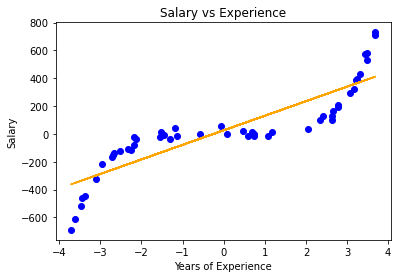

Predicted values  [ 137.68 -255.01  269.49]
Real values       [ -15.820143 -148.63097   102.44357 ]
Trained W         104.24
Trained b         26.33


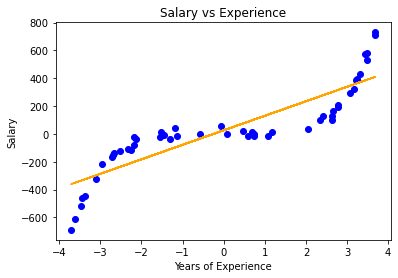

Predicted values  [ 137.37 -254.09  268.77]
Real values       [ -15.820143 -148.63097   102.44357 ]
Trained W         103.91
Trained b         26.37


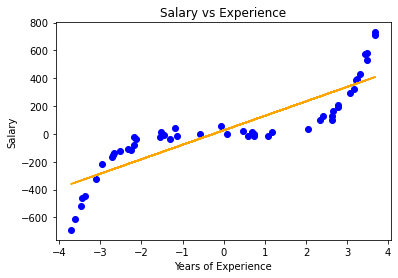

Predicted values  [ 137.06 -253.19  268.05]
Real values       [ -15.820143 -148.63097   102.44357 ]
Trained W         103.59
Trained b         26.41


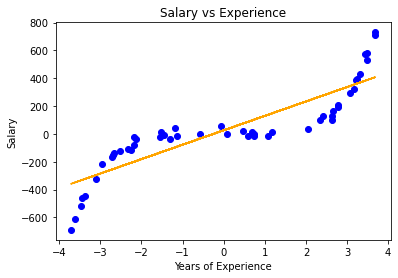

Predicted values  [ 136.75 -252.29  267.33]
Real values       [ -15.820143 -148.63097   102.44357 ]
Trained W         103.27
Trained b         26.44


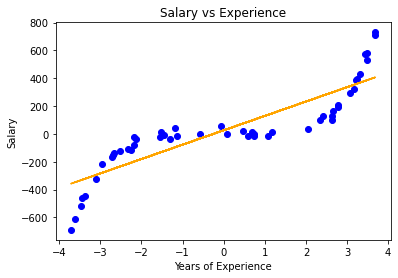

Predicted values  [ 136.44 -251.39  266.62]
Real values       [ -15.820143 -148.63097   102.44357 ]
Trained W         102.95
Trained b         26.47


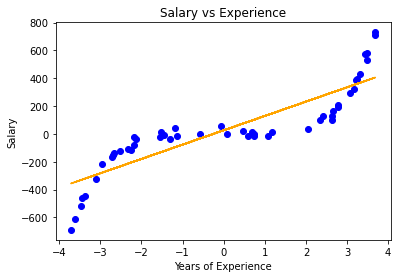

Predicted values  [ 136.14 -250.5   265.92]
Real values       [ -15.820143 -148.63097   102.44357 ]
Trained W         102.63
Trained b         26.51


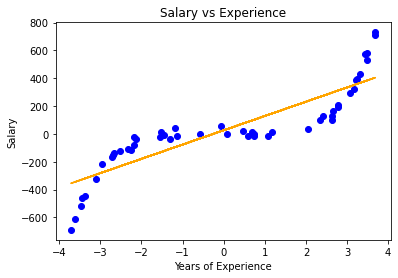

Predicted values  [ 135.83 -249.61  265.22]
Real values       [ -15.820143 -148.63097   102.44357 ]
Trained W         102.32
Trained b         26.54


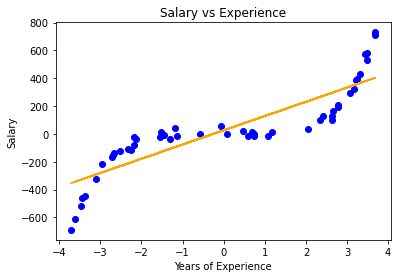

In [33]:

# Importing libraries
  
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Ridge Regression
  
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
      
# Driver code
  
def main() :
      
    # Importing dataset    
    df = pd.read_csv( "PS3-1/test_data.csv" )
    X_train = df['x'].values
    X_train=X_train.reshape(X_train.shape[0], 1)
    Y_train = df['y'].values    
    df2=pd.read_csv( "PS3-1/train_data.csv" )
    X_test = df['x'].values
    X_test=X_test.reshape(X_test.shape[0], 1)
    Y_test = df['y'].values  
    # Splitting dataset into train and test set
    print(X_train.shape)
#     df = pd.read_csv( "salary_data.csv" )
#     X = df.iloc[:, :-1].values
#     Y = df.iloc[:, 1].values    
#     X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                                            
#                                           test_size = 1 / 3, random_state = 0 )
#     print(X_train.shape)
#     print(Y_train.shape())
#     print(X_test.shape())
#     print(Y_test.shape())
      
    # Model training 
    for l2_penality in range(1,11):
        model = RidgeRegression( iterations = 1000,                             
                                learning_rate = 0.01, l2_penality =l2_penality)
        model.fit( X_train, Y_train )
          
        # Prediction on test set
        Y_pred = model.predict( X_test )    
        print( "Predicted values ", np.round( Y_pred[:3], 2 ) )     
        print( "Real values      ", Y_test[:3] )    
        print( "Trained W        ", round( model.W[0], 2 ) )    
        print( "Trained b        ", round( model.b, 2 ) )
          
        # Visualization on test set     
        plt.scatter( X_test, Y_test, color = 'blue' )    
        plt.plot( X_test, Y_pred, color = 'orange' )    
        plt.title( 'Salary vs Experience' )    
        plt.xlabel( 'Years of Experience' )    
        plt.ylabel( 'Salary' )    
        plt.show()
      
if __name__ == "__main__" : 
    main()

[[100.   0.]
 [  0. 100.]]
theta is  113.72543565421051
intercept is 11.810004110685643


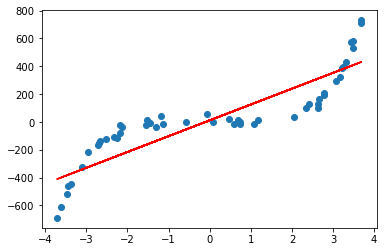

theta is  26.071979611251482
intercept is 0.8062227894807944


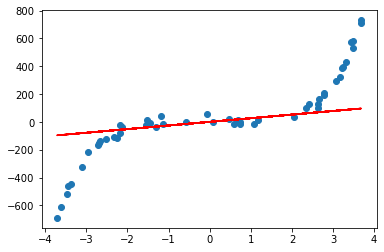

theta is  14.722449937066582
intercept is 0.4286041328312562


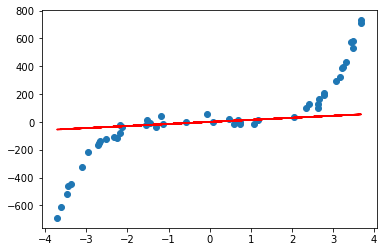

theta is  10.257283461742473
intercept is 0.2922153981063979


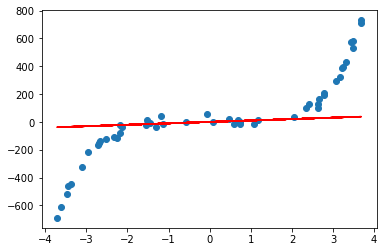

theta is  7.870300758540332
intercept is 0.22172842399300574


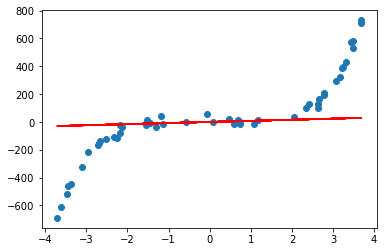

theta is  6.384546119927535
intercept is 0.17865277825150033


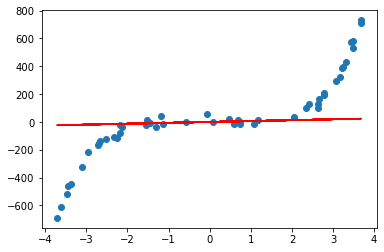

theta is  5.370671146262443
intercept is 0.14959666322907958


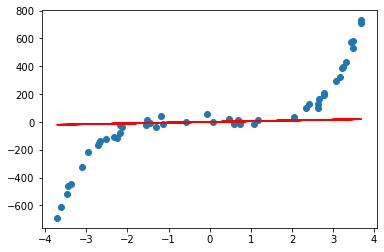

theta is  4.634677685782354
intercept is 0.12867207977080236


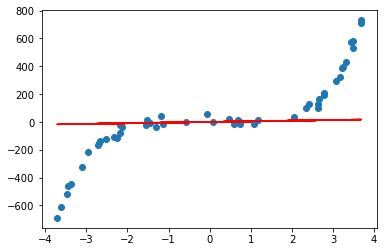

theta is  4.07609245498893
intercept is 0.11288390581767019


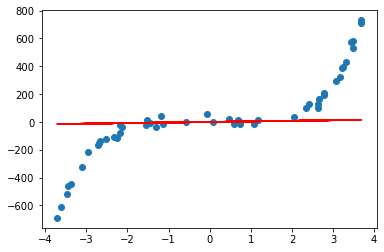

theta is  3.6376696045435906
intercept is 0.10054733292848773


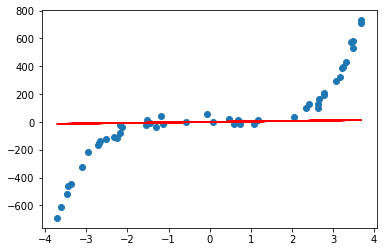

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
identity_matrix=np.identity(2)
lamda=100
print(lamda*identity_matrix)
train_data = pd.read_csv("PS3-1/train_data.csv")

train_data['intercept'] = 1
x = train_data[['x', 'intercept']]

Y = train_data['y']

for lamda in range(1,10000,1000):
    theta_and_intercept = np.dot(np.linalg.inv(np.dot(x.T, x)+lamda*identity_matrix), np.dot(x.T, Y))
    theta = theta_and_intercept[0]
    print('theta is ',theta)
    intercept = theta_and_intercept[1]
    print('intercept is',intercept)
    test_data = pd.read_csv("PS3-1/test_data.csv")
    
    test_data['y_prediction'] = theta*test_data['x']+intercept
    plt.scatter(test_data['x'], test_data['y'])
    plt.plot(test_data['x'], test_data['y_prediction'], '-r', label='y=2x+1')
    plt.show()
    plt.close()



